## Feature Engineering

In [1]:
import pandas as pd
import featuretools as ft

In [352]:
df_anp = pd.read_pickle('../../data/Visual_well_being/anp.pickle')
df_celeb = pd.read_pickle('../../data/Visual_well_being/celebrity.pickle')
df_face = pd.read_pickle('../../data/Visual_well_being/face.pickle')
df_img_data = pd.read_pickle('../../data/Visual_well_being/image_data.pickle')
df_img_metrics = pd.read_pickle('../../data/Visual_well_being/image_metrics.pickle')
df_object = pd.read_pickle('../../data/Visual_well_being/object_labels.pickle')
df_survey = pd.read_pickle('../../data/Visual_well_being/survey.pickle')

In [353]:
import sys
lib_dir = "../../libs/"
if lib_dir not in sys.path:
    sys.path.append(lib_dir)

In [354]:
import image_level_agg_features as img_f
import user_level_agg_features as usr_f

In [355]:
# Create new entityset
es = ft.EntitySet(id = 'users')

In [356]:
df_survey.head()

,index,id,gender,born,education,employed,income,A_2,N_1,P_1,...,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account
22,44,d3cbd581e36ca09964db98869893bb3c,Female,1974,High school graduate,A homemaker,"$40,000 to $49,999",6,2,4,...,3.000000,5.333333,3.666667,5.333333,5.333333,4.4375,3.000000,3.000000,1515.0,public
57,114,38ef7aa1fe951a299fc0ca399f2b7545,Female,1980,College graduate,Employed for wages,"$50,000 to $59,999",8,6,8,...,7.666667,8.333333,7.333333,7.666667,8.000000,7.8750,5.666667,7.666667,123.0,public
58,117,e96c67e535cb4dadfc2a7a15c95fc310,Male,1995,High school graduate,Out of work and looking for work,"$100,000 to $149,999",5,8,7,...,4.666667,8.000000,6.333333,4.666667,5.000000,5.6875,5.000000,4.666667,350.0,public
5,10,8393c367c91dbc479eb9bdb2e41e6eb5,Female,1979,High school graduate,Self-employed,"$100,000 to $149,999",7,8,10,...,10.000000,9.333333,10.000000,9.333333,7.666667,9.2500,3.333333,10.000000,609.0,public
26,63,908c12a6a174905349f0fe7e4d00ff2b,Female,1987,College graduate,Employed for wages,"$150,000 or more",7,8,6,...,6.333333,4.666667,8.333333,5.666667,8.333333,6.6250,4.333333,6.333333,64.0,public


In [357]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 22 to 153
Data columns (total 46 columns):
index              159 non-null int64
id                 159 non-null category
gender             159 non-null category
born               159 non-null int32
education          159 non-null category
employed           159 non-null category
income             159 non-null category
A_2                159 non-null int32
N_1                159 non-null int32
P_1                159 non-null int32
E_1                159 non-null int32
A_1                159 non-null int32
H_1                159 non-null int32
M_1                159 non-null int32
R_1                159 non-null int32
M_2                159 non-null int32
E_2                159 non-null int32
LON                159 non-null int32
H_2                159 non-null int32
P_2                159 non-null int32
N_2                159 non-null int32
A_3                159 non-null int32
N_3                159 non-null int32
E_3  

In [359]:
df_survey = df_survey.drop(df_survey.loc[:,'A_2':'HAP'].columns, axis=1)
df_survey = df_survey.drop(df_survey.loc[:,'E':'P_EMO'].columns, axis=1)
df_survey = df_survey.drop_duplicates('insta_user_id')

df_img_data['image_posted_time'] = pd.to_datetime(df_img_data['image_posted_time'])
df_img_data['user_id'] = pd.to_numeric(df_img_data['user_id'])
df_survey['insta_user_id'] = pd.to_numeric(df_survey['insta_user_id'])

In [360]:
df_survey = df_survey.drop('id', axis=1)
#df_survey = df_survey.drop('network_id', axis=1)

In [361]:
df_survey.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 22 to 153
Data columns (total 15 columns):
index              159 non-null int64
gender             159 non-null category
born               159 non-null int32
education          159 non-null category
employed           159 non-null category
income             159 non-null category
participate        159 non-null category
insta_user_id      159 non-null int64
completed          159 non-null category
start_q            159 non-null datetime64[ns]
end_q              159 non-null category
network_id         159 non-null category
P                  159 non-null float64
imagecount         159 non-null float64
private_account    159 non-null object
dtypes: category(8), datetime64[ns](1), float64(2), int32(1), int64(2), object(1)
memory usage: 37.6+ KB


In [362]:
df_survey['start_q'] = pd.to_datetime(df_survey['start_q'])
df_survey['end_q'] = pd.to_datetime(df_survey['end_q'])

In [363]:
df_survey

,index,gender,born,education,employed,income,participate,insta_user_id,completed,start_q,end_q,network_id,P,imagecount,private_account
22,44,Female,1974,High school graduate,A homemaker,"$40,000 to $49,999",Yes,1619510,true,2016-12-05 15:05:10,2016-12-05 15:07:11,bac6d0bc5f,3.000000,1515.0,public
57,114,Female,1980,College graduate,Employed for wages,"$50,000 to $59,999",Yes,2829661,true,2016-12-05 17:25:25,2016-12-05 17:27:11,166771a7e8,7.666667,123.0,public
58,117,Male,1995,High school graduate,Out of work and looking for work,"$100,000 to $149,999",Yes,3069744,true,2016-12-05 17:25:35,2016-12-05 17:28:25,4dd73dcee9,4.666667,350.0,public
5,10,Female,1979,High school graduate,Self-employed,"$100,000 to $149,999",Yes,3988856,true,2016-12-05 14:03:39,2016-12-05 14:05:37,72aa611d17,10.000000,609.0,public
26,63,Female,1987,College graduate,Employed for wages,"$150,000 or more",Yes,4185084,true,2016-12-05 15:45:05,2016-12-05 15:46:56,73392e2042,6.333333,64.0,public
21,43,Female,1992,College graduate,Employed for wages,"$50,000 to $59,999",Yes,6734387,true,2016-12-05 14:59:15,2016-12-05 15:00:59,f98e283b21,6.000000,464.0,public
78,153,Female,1984,College graduate,A homemaker,"$90,000 to $99,999",Yes,7410944,true,2016-12-05 18:56:50,2016-12-05 18:58:23,551af3f4c0,8.000000,396.0,public
86,166,Female,1985,High school graduate,Employed for wages,"$40,000 to $49,999",Yes,8854187,true,2016-12-05 19:02:26,2016-12-05 19:15:39,9ec6dc000d,6.666667,595.0,public
127,251,Female,1985,High school graduate,A homemaker,"$60,000 to $69,999",Yes,9931123,true,2017-02-13 18:02:38,2017-02-13 18:05:44,7cb1bd0438,6.333333,5.0,public
9,16,Female,1978,High school graduate,A homemaker,"$90,000 to $99,999",Yes,11520833,true,2016-12-05 14:08:47,2016-12-05 14:10:57,89140f0f7a,8.000000,312.0,public


In [364]:
df_img_data_metrics = pd.merge(df_img_data, df_img_metrics, on='image_id')

In [365]:
#Create two FT entities

es = es.entity_from_dataframe(entity_id = 'users', dataframe = df_survey.drop('P', axis=1), 
                              index = 'insta_user_id')

es = es.entity_from_dataframe(entity_id = 'image_data_metrics', dataframe = df_img_data_metrics, make_index=True, 
                              variable_types = {'user_bio': ft.variable_types.Text, 'user_website': ft.variable_types.Text}, index='data_metric_id', time_index='comment_count_time_created')


In [366]:
# Relationship between users and images
r_user_img_data_metrics = ft.Relationship(es['users']['insta_user_id'],
                                    es['image_data_metrics']['user_id'])

# Add the relationship to the entity set
es = es.add_relationship(r_user_img_data_metrics)

In [367]:
# Perform deep feature synthesis without specifying primitives
features, feature_names = ft.dfs(entityset=es, target_entity='users', 
                                 max_depth = 2)

features.head()

,index,born,imagecount,private_account,gender,education,employed,income,participate,completed,...,MODE(image_data_metrics.DAY(like_count_time_created)),MODE(image_data_metrics.YEAR(image_posted_time)),MODE(image_data_metrics.YEAR(comment_count_time_created)),MODE(image_data_metrics.YEAR(like_count_time_created)),MODE(image_data_metrics.MONTH(image_posted_time)),MODE(image_data_metrics.MONTH(comment_count_time_created)),MODE(image_data_metrics.MONTH(like_count_time_created)),MODE(image_data_metrics.WEEKDAY(image_posted_time)),MODE(image_data_metrics.WEEKDAY(comment_count_time_created)),MODE(image_data_metrics.WEEKDAY(like_count_time_created))
insta_user_id,,,,,,,,,,,,,,,,,,,,,
1619510,44,1974,1515.0,public,Female,High school graduate,A homemaker,"$40,000 to $49,999",Yes,true,...,19.0,2012.0,2017.0,2017.0,4.0,6.0,6.0,6.0,0.0,0.0
2829661,114,1980,123.0,public,Female,College graduate,Employed for wages,"$50,000 to $59,999",Yes,true,...,19.0,2011.0,2017.0,2017.0,5.0,6.0,6.0,6.0,0.0,0.0
3069744,117,1995,350.0,public,Male,High school graduate,Out of work and looking for work,"$100,000 to $149,999",Yes,true,...,19.0,2013.0,2017.0,2017.0,10.0,6.0,6.0,6.0,0.0,0.0
3988856,10,1979,609.0,public,Female,High school graduate,Self-employed,"$100,000 to $149,999",Yes,true,...,19.0,2013.0,2017.0,2017.0,5.0,6.0,6.0,2.0,0.0,0.0
4185084,63,1987,64.0,public,Female,College graduate,Employed for wages,"$150,000 or more",Yes,true,...,19.0,2015.0,2017.0,2017.0,7.0,6.0,6.0,6.0,0.0,0.0


In [392]:
features.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1619510 to 4249629173
Data columns (total 152 columns):
index                                                                 int64
born                                                                  int32
imagecount                                                            float64
private_account                                                       object
gender                                                                category
education                                                             category
employed                                                              category
income                                                                category
participate                                                           category
completed                                                             category
network_id                                                            category
SUM(image_data_metric

In [398]:
df_merge = pd.merge(features, df_survey.loc[:,['P', 'insta_user_id']], left_index=True, right_on='insta_user_id')

In [408]:
df_merge.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 22 to 153
Data columns (total 935 columns):
born                                                                  int32
imagecount                                                            float64
SUM(image_data_metrics.image_height)                                  float64
SUM(image_data_metrics.image_width)                                   float64
SUM(image_data_metrics.data_memorability)                             float64
SUM(image_data_metrics.user_followed_by)                              float64
SUM(image_data_metrics.user_follows)                                  float64
SUM(image_data_metrics.user_posted_photos)                            float64
SUM(image_data_metrics.comment_count)                                 float64
SUM(image_data_metrics.like_count)                                    float64
STD(image_data_metrics.image_height)                                  float64
STD(image_data_metrics.image_width)  

In [400]:
df_merge = df_merge.drop(['index', 'participate', 'completed', 'network_id', 'insta_user_id'], axis=1)

In [401]:
for column in df_merge.columns:
    
    if (str(df_merge[column].dtype) == 'category') | (str(df_merge[column].dtype) == 'object'):
        
        df_merge = pd.concat([df_merge, pd.get_dummies(df_merge[column])], axis=1)
        df_merge = df_merge.drop(column, axis=1)

In [407]:
df_merge.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
born,159.0,1985.490566,9.332716e+00,1948.000000,1981.000000,1987.000000,1992.000000,1.998000e+03
imagecount,159.0,259.157233,3.547778e+02,1.000000,22.000000,98.000000,370.500000,1.545000e+03
SUM(image_data_metrics.image_height),159.0,174854.358491,2.863217e+05,0.000000,11520.000000,52919.000000,225438.000000,1.948270e+06
SUM(image_data_metrics.image_width),159.0,175110.918239,2.866331e+05,0.000000,11520.000000,52760.000000,225190.000000,1.947440e+06
SUM(image_data_metrics.data_memorability),159.0,225.353654,3.689818e+02,0.000000,14.798721,67.311427,290.831896,2.485272e+03
SUM(image_data_metrics.user_followed_by),159.0,150114.974843,3.061357e+05,0.000000,1113.000000,19000.000000,115125.500000,1.869375e+06
SUM(image_data_metrics.user_follows),159.0,253207.000000,1.149822e+06,0.000000,1808.500000,26800.000000,118072.500000,1.340555e+07
SUM(image_data_metrics.user_posted_photos),159.0,222001.597484,5.873971e+05,0.000000,421.000000,7900.000000,137452.000000,3.611385e+06
SUM(image_data_metrics.comment_count),159.0,262.578616,4.293620e+02,0.000000,4.500000,62.000000,296.500000,1.945000e+03
SUM(image_data_metrics.like_count),159.0,4985.610063,8.146499e+03,0.000000,122.000000,1163.000000,5384.000000,3.599600e+04


In [402]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [403]:
x_train, x_test, y_train, y_test = train_test_split(df_merge.drop('P', axis=1), df_merge.P, test_size=0.3)

In [404]:
model = RandomForestRegressor()

In [405]:
df_merge.head()

,born,imagecount,SUM(image_data_metrics.image_height),SUM(image_data_metrics.image_width),SUM(image_data_metrics.data_memorability),SUM(image_data_metrics.user_followed_by),SUM(image_data_metrics.user_follows),SUM(image_data_metrics.user_posted_photos),SUM(image_data_metrics.comment_count),SUM(image_data_metrics.like_count),...,toladify,traciebee12,trip_trader,troublemaker720,unwcandidcampus,wfrisbee,wigsplitter27,wiscoman,yokastaschneider,yourfoxygrandma
22,1974,1515.0,950266.0,953636.0,1220.343579,556556.0,1244606.0,3114573.0,1183.0,10278.0,...,0,0,0,0,0,0,0,0,0,0
57,1980,123.0,203260.0,201096.0,249.012550,63756.0,92736.0,39928.0,120.0,2299.0,...,0,0,0,0,0,0,0,0,0,0
58,1995,350.0,211612.0,212332.0,283.515559,106051.0,81840.0,119350.0,745.0,4600.0,...,0,0,0,0,0,0,0,0,0,0
5,1979,609.0,378994.0,379136.0,512.292704,445788.0,574287.0,371490.0,780.0,6074.0,...,0,0,0,0,0,0,0,0,1,0
26,1987,64.0,22703.0,23956.0,28.091945,912.0,2470.0,2432.0,30.0,208.0,...,0,0,0,0,0,0,0,0,0,0


In [406]:
model.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [322]:
pred = model.predict(x_test)

In [323]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)

In [324]:
print(mse)

3.41789351852


In [325]:
print(mae)

1.51736111111


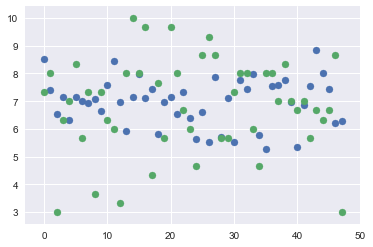

In [326]:
plt.scatter(range(0, len(pred)), pred)
plt.scatter(range(0, len(y_test)), y_test)

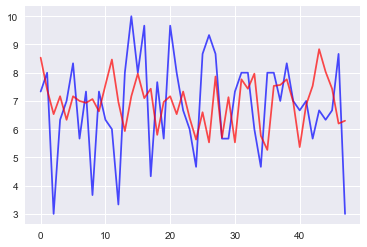

In [336]:

plt.plot(range(0, len(y_test)), y_test, color='blue', alpha=0.7)
plt.plot(range(0, len(pred)), pred, color='red', alpha=0.7)

In [337]:
df = pd.DataFrame(data={'feature': x_train.columns, 'importance': model.feature_importances_})

In [338]:
df

,feature,importance
0,born,0.230629
1,imagecount,0.257446
2,Female,0.020540
3,Male,0.024962
4,College graduate,0.023160
5,High school graduate,0.039858
6,Post graduate degree,0.011856
7,Some high school,0.000040
8,A homemaker,0.006410
9,A student,0.023989
